In [52]:
import pandas as pd
import bnlearn as bn

import warnings
import os

warnings.filterwarnings("ignore")

In [53]:
# version bnlearn
print(bn.__version__)

0.8.9


In [54]:
train = pd.read_csv('../data/dataset.csv')

train['Passenger ID'] = train.index

# Atau, tambahkan kolom "Passenger ID" dengan nilai unik (misalnya, nomor urut)
train['Passenger ID'] = range(1, len(train) + 1)

cols = list(train.columns)
cols = ['Passenger ID'] + [col for col in cols if col != 'Passenger ID']
train = train[cols]

train.set_index('Passenger ID', inplace=True)

# Tampilkan trainFrame
train

,Nama Wisata,escape,relaxation,play,strengthening_family_bonds,prestige,social_interaction,romance,educational_opportunity,self_fulfillment,...,memancing,berbelanja,berziarah,berkemah,berenang,mengambil_foto,makan,bermain_wahana,berendam,belajar
Passenger ID,,,,,,,,,,,,,,,,,,,,,
1,Pantai Joko Mursodo,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,Pantai Joko Mursodo,0,1,0,0,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,Pantai Joko Mursodo,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,Pantai Joko Mursodo,1,1,0,1,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
5,Pantai Joko Mursodo,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,Makam Syekh Maulana Ishaq,0,0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
597,Makam Syekh Maulana Ishaq,0,0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
598,Makam Syekh Maulana Ishaq,0,0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [55]:
train.describe()

,escape,relaxation,play,strengthening_family_bonds,prestige,social_interaction,romance,educational_opportunity,self_fulfillment,wish_fulfillment,...,memancing,berbelanja,berziarah,berkemah,berenang,mengambil_foto,makan,bermain_wahana,berendam,belajar
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,...,600.00000,600.000000,600.000000,600.00000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,0.611667,0.798333,0.398333,0.525000,0.035000,0.898333,0.160000,0.245000,0.371667,0.051667,...,0.10000,0.050000,0.250000,0.10000,0.158333,0.858333,0.458333,0.255000,0.050000,0.241667
std,0.487778,0.401579,0.489963,0.499791,0.183933,0.302462,0.366912,0.430446,0.483653,0.221538,...,0.30025,0.218127,0.433374,0.30025,0.365358,0.348999,0.498677,0.436225,0.218127,0.428451
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.00000,0.000000,0.250000,0.00000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [56]:
drop_list = ['aktivitas_wisata']

train = train.drop(columns=drop_list)

In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 600 entries, 1 to 600
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Nama Wisata                 600 non-null    object
 1   escape                      600 non-null    int64 
 2   relaxation                  600 non-null    int64 
 3   play                        600 non-null    int64 
 4   strengthening_family_bonds  600 non-null    int64 
 5   prestige                    600 non-null    int64 
 6   social_interaction          600 non-null    int64 
 7   romance                     600 non-null    int64 
 8   educational_opportunity     600 non-null    int64 
 9   self_fulfillment            600 non-null    int64 
 10  wish_fulfillment            600 non-null    int64 
 11  infrastruktur_pariwisata    600 non-null    int64 
 12  edukasi                     600 non-null    int64 
 13  alam_sekitar                600 non-null    int64 
 14 

In [58]:
dfhot_train, dfnum_train = bn.df2onehot(train)


[df2onehot] >Auto detecting dtypes.


100%|██████████| 28/28 [00:00<00:00, 312.98it/s]


[df2onehot] >Set dtypes in dataframe..


[df2onehot]: 100%|██████████| 28/28 [00:00<00:00, 426.19it/s]

[df2onehot] >Total onehot features: 74


In [59]:
# Pastikan kolom dikonversi ke kategori dulu
train['Nama Wisata'] = train['Nama Wisata'].astype('category')

# Ambil mapping angka ke nama
label_map = dict(zip(train['Nama Wisata'].cat.codes, train['Nama Wisata']))

# Contoh hasil
print(label_map)

{10: 'Pantai Joko Mursodo', 12: 'Pantai Pengkolan Kandang Semangkon', 11: 'Pantai Kutang', 14: 'Taman Wisata dan Perkemahan Bumi Moronyamplung', 2: 'Gunung Mas Mantup', 1: 'Goa Maharani', 19: 'Wisata Gunung Pegat', 16: 'Wisata Air Hangat Mbrumbung', 13: 'Taman Ekspresi Kendalifornia', 15: 'Waduk Gondang', 4: 'Kolam Renang Keraton', 18: 'Wisata Edukasi Gondang Outbond', 3: 'INDONESIA ISLAMIC ART MUSEUM', 17: 'Wisata Bahari Lamongan', 0: 'G-Park', 5: 'Makam Sendang Duwur', 6: 'Makam Sunan Drajat', 9: 'Masjid Namira', 8: 'Masjid Ki Bagus Hadikusumo', 7: 'Makam Syekh Maulana Ishaq'}


In [60]:
dfnum_train

,Nama Wisata,escape,relaxation,play,strengthening_family_bonds,prestige,social_interaction,romance,educational_opportunity,self_fulfillment,...,memancing,berbelanja,berziarah,berkemah,berenang,mengambil_foto,makan,bermain_wahana,berendam,belajar
0,11,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,11,0,1,0,0,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,11,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,11,1,1,0,1,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,11,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,8,0,0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
596,8,0,0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
597,8,0,0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
598,8,0,0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [61]:
dfnum_target = dfnum_train['Nama Wisata']

In [62]:
params_static = {
    'figsize': (15, 10),
    'width': 20,  # Menyesuaikan lebar panah
    'edge_alpha': 0.5,  # Menyesuaikan kejelasan panah
    'arrowstyle': '-|>',  # Gaya panah (ubah sesuai kebutuhan)
    'arrowsize': 20,  # Ukuran panah
    'minscale': 5,
    'maxscale': 15,
    'layout': 'spring_layout',
    'font_size': 14,
    'font_family': 'sans-serif',
    'alpha': 0.8,
    'node_shape': 'o',
    'font_color': '#000000',
    'facecolor': 'white',
    'visible': True
}

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


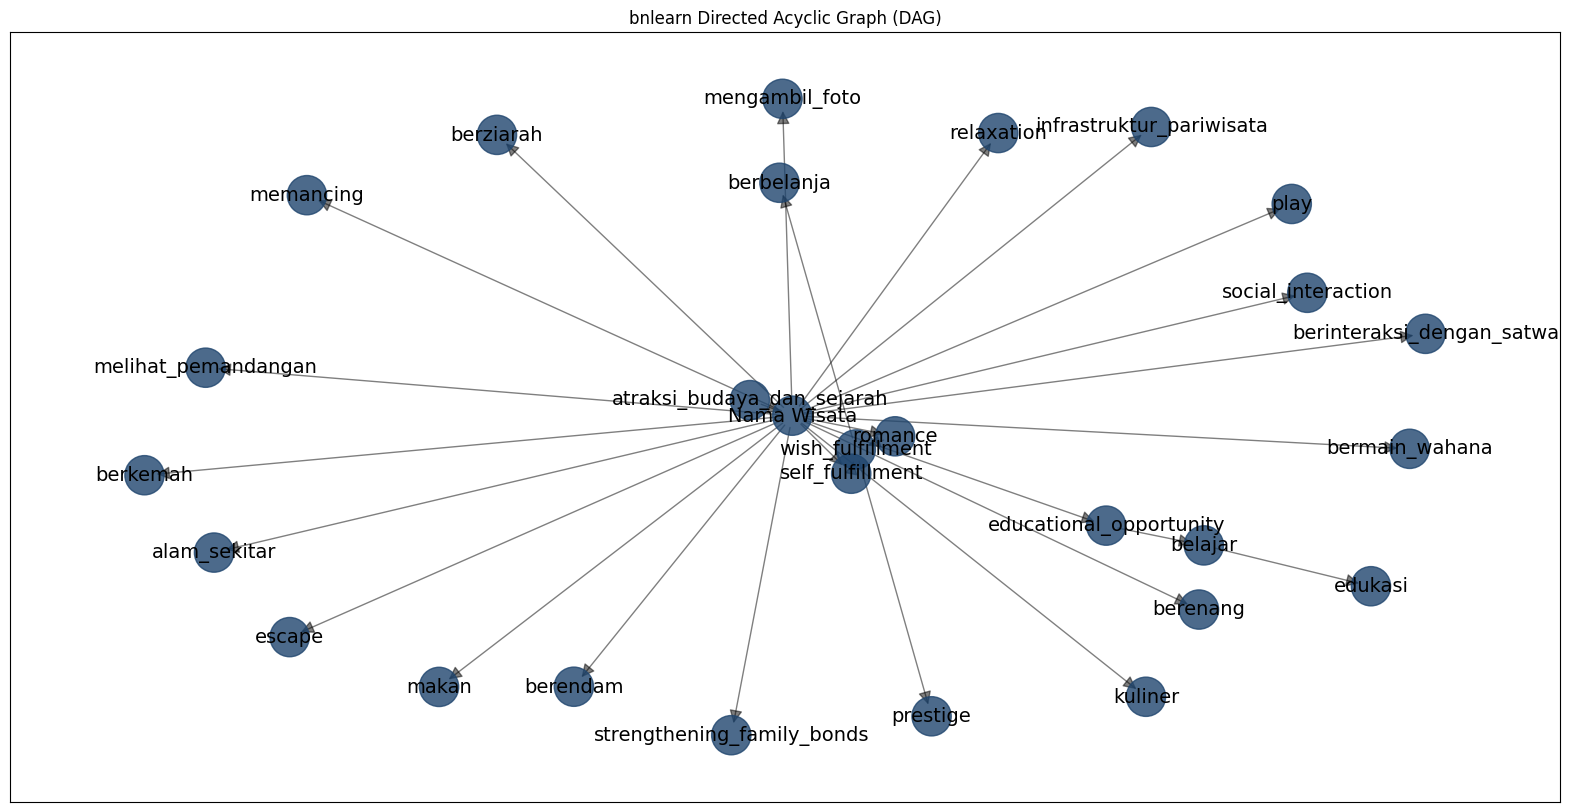

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of Nama Wisata:
+----------------------------+-----+-------------------------------+
| atraksi_budaya_dan_sejarah | ... | atraksi_budaya_dan_sejarah(1) |
+----------------------------+-----+-------------------------------+
| Nama Wisata(1)             | ... | 0.03676470588235294           |
+----------------------------+-----+-------------------------------+
| Nama Wisata(2)             | ... | 0.03676470588235294           |
+----------------------------+-----+-------------------------------+
| Nama Wisata(3)             | ... | 0.03676470588235294           |
+----------------------------+-----+-------------------------------+
| Nama Wisata(4)             | ... | 0.08088235294117647           |
+----------------------------+-----+-------------------------------+
| Nama Wisata(5)

18-04-25 08:10:12 [pypickle.pypickle] > INFO     > Pickle file saved: D:\Project\Tugas Akhir\api\model\model.pkl
18-04-25 08:10:12 [pypickle.pypickle] > INFO     > Pickle file saved: D:\Project\Tugas Akhir\model\notebooks\..\model\model.pkl


[pypickle]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.
[pypickle]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


True

In [63]:
# Structure learning
DAG = bn.structure_learning.fit(dfnum_train, methodtype='hc', root_node='Nama Wisata', bw_list_method='nodes', verbose=3)

# Plot
bn.plot(DAG, interactive=False, params_static=params_static)

# Parameter learning
model_fit = bn.parameter_learning.fit(DAG, dfnum_train, verbose=3)

# bn.save(
#     model_fit,
#     os.path.abspath('../../api/model/model.pkl'),
#     overwrite=True,
# )

bn.save(
    model_fit,
    "../model/model.pkl",
    overwrite=True,
)

In [64]:
# print DAG
print(DAG['adjmat'])

target                     Nama Wisata escape relaxation   play  \
source                                                            
Nama Wisata                      False      1          1      1   
escape                           False  False      False  False   
relaxation                       False  False      False  False   
play                             False  False      False  False   
strengthening_family_bonds       False  False      False  False   
prestige                         False  False      False  False   
social_interaction               False  False      False  False   
romance                          False  False      False  False   
educational_opportunity          False  False      False  False   
self_fulfillment                 False  False      False  False   
wish_fulfillment                 False  False      False  False   
infrastruktur_pariwisata         False  False      False  False   
edukasi                          False  False      False  Fals

In [65]:
vector = bn.adjmat2vec(DAG['adjmat'])

print(vector)

                        source                      target weight
0                  Nama Wisata                      escape      1
1                  Nama Wisata                  relaxation      1
2                  Nama Wisata                        play      1
3                  Nama Wisata  strengthening_family_bonds      1
4                  Nama Wisata          social_interaction      1
5                  Nama Wisata                     romance      1
6                  Nama Wisata     educational_opportunity      1
7                  Nama Wisata            self_fulfillment      1
8                  Nama Wisata    infrastruktur_pariwisata      1
9                  Nama Wisata                alam_sekitar      1
10                 Nama Wisata                     kuliner      1
11                 Nama Wisata         melihat_pemandangan      1
12                 Nama Wisata   berinteraksi_dengan_satwa      1
13                 Nama Wisata                   memancing      1
14        

In [69]:
evidence = {
    'escape': 1,
    'relaxation': 1,
    'play': 0,
    'strengthening_family_bonds': 1,
    'prestige': 0,
    'social_interaction': 0,
    'romance': 0,
    'educational_opportunity': 0,
    'self_fulfillment': 0,
    'wish_fulfillment': 0,
    'infrastruktur_pariwisata': 1,
    'edukasi': 0,
    'alam_sekitar': 0,
    'atraksi_budaya_dan_sejarah': 1,
    'kuliner': 0,
    'berendam': 0,
    'bermain_wahana': 0,
    'melihat_pemandangan': 0,
    'mengambil_foto': 0,
    'berkemah': 0,
    'berbelanja': 0,
    'berziarah': 1,
    'memancing': 0,
    'berinteraksi_dengan_satwa': 0,
    'makan': 0,
    'belajar': 0,
    'berenang': 0
}

evidence

{'escape': 1,
 'relaxation': 1,
 'play': 0,
 'strengthening_family_bonds': 1,
 'prestige': 0,
 'social_interaction': 0,
 'romance': 0,
 'educational_opportunity': 0,
 'self_fulfillment': 0,
 'wish_fulfillment': 0,
 'infrastruktur_pariwisata': 1,
 'edukasi': 0,
 'alam_sekitar': 0,
 'atraksi_budaya_dan_sejarah': 1,
 'kuliner': 0,
 'berendam': 0,
 'bermain_wahana': 0,
 'melihat_pemandangan': 0,
 'mengambil_foto': 0,
 'berkemah': 0,
 'berbelanja': 0,
 'berziarah': 1,
 'memancing': 0,
 'berinteraksi_dengan_satwa': 0,
 'makan': 0,
 'belajar': 0,
 'berenang': 0}

In [70]:
query = bn.inference.fit(model_fit, variables=['Nama Wisata'], evidence=evidence, verbose=3,elimination_order="MinWeight")


[bnlearn] >Variable Elimination.


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+---------------+-------------+
|    |   Nama Wisata |           p |
+====+===============+=============+
|  0 |             1 | 0.00182058  |
+----+---------------+-------------+
|  1 |             2 | 0.00495674  |
+----+---------------+-------------+
|  2 |             3 | 0.00250391  |
+----+---------------+-------------+
|  3 |             4 | 0.0308188   |
+----+---------------+-------------+
|  4 |             5 | 0.0663015   |
+----+---------------+-------------+
|  5 |             6 | 0.10046     |
+----+---------------+-------------+
|  6 |             7 | 0.0456636   |
+----+---------------+-------------+
|  7 |             8 | 0.221012    |
+----+---------------+-------------+
|  8 |             9 | 0.10046     |
+----+---------------+-------------+
|  9 |            10 | 0.221012    |
+----+---------------+-------------+
| 10 |            11 | 0.0492179   |
+----+---

In [71]:
query.df['Nama Wisata'] = label_map

query.df = query.df.sort_values(by='p', ascending=False)
query.df


,Nama Wisata,p
9,Masjid Namira,0.221012
7,Makam Syekh Maulana Ishaq,0.221012
8,Masjid Ki Bagus Hadikusumo,0.100460
5,Makam Sendang Duwur,0.100460
4,Kolam Renang Keraton,0.066302
12,Pantai Pengkolan Kandang Semangkon,0.058380
10,Pantai Joko Mursodo,0.049218
6,Makam Sunan Drajat,0.045664
19,Wisata Gunung Pegat,0.034040
3,INDONESIA ISLAMIC ART MUSEUM,0.030819
